In [26]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np 
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


# Load the MNIST dataset

In [27]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data

In [28]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model

In [29]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model

In [30]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model

In [31]:

model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 14s 30ms/step - loss: 0.2159 - accuracy: 0.9374 - val_loss: 0.0850 - val_accuracy: 0.9738
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0677 - accuracy: 0.9802 - val_loss: 0.0531 - val_accuracy: 0.9829
Epoch 3/5
469/469 [==============================] - 15s 32ms/step - loss: 0.0461 - accuracy: 0.9870 - val_loss: 0.0508 - val_accuracy: 0.9837
Epoch 4/5
469/469 [==============================] - 15s 33ms/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0419 - val_accuracy: 0.9863
Epoch 5/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.0524 - val_accuracy: 0.9814


# Print the predicted images with red text

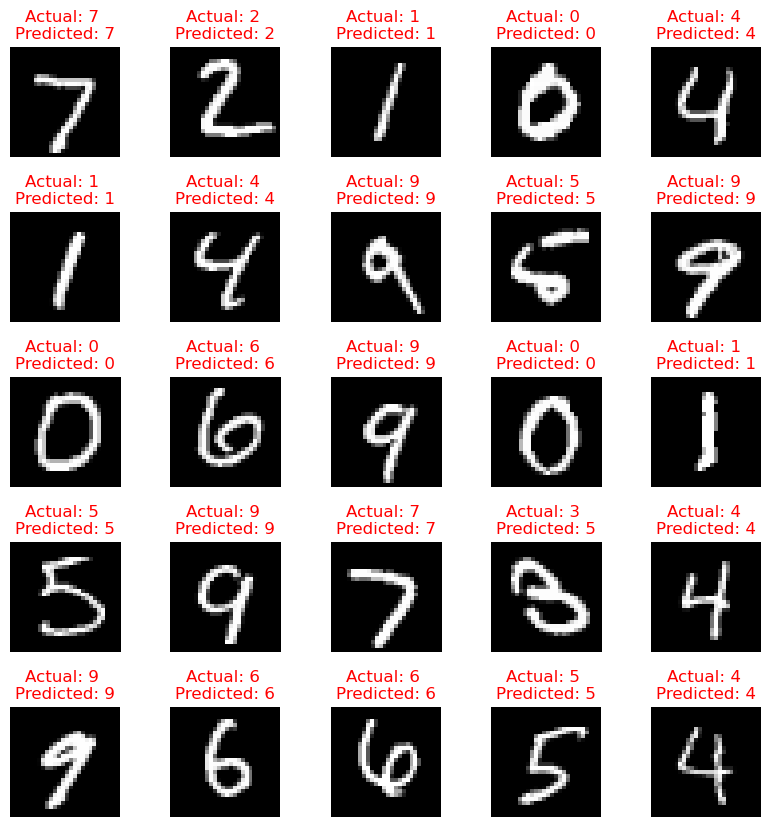

In [34]:

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(25):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title('Actual: %s \nPredicted: %s' % (np.argmax(y_test[i]), predicted_labels[i]), color='red')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()